In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('cleaned_text.csv')

In [3]:
df.sample(4)

,label,text,cleaned_text,num_characters,num_words,num_sentences
3015,0,X2 &lt;#&gt; . Are you going to get that,x ltgt go get,13,4,1
10745,0,chuck murcko wrote the usual crud why do moron...,chuck murcko wrote usual crud moron rant beat ...,390,71,1
4376,0,Surly ill give it to you:-) while coming to re...,surli ill give come review,26,5,1
10376,0,in forteana y martin adamson martin s wrote f...,forteana martin adamson martin wrote altern ra...,293,47,1


In [4]:
df.shape

(14618, 6)

In [5]:
df.isnull().sum()

label             0
text              0
cleaned_text      7
num_characters    0
num_words         0
num_sentences     0
dtype: int64

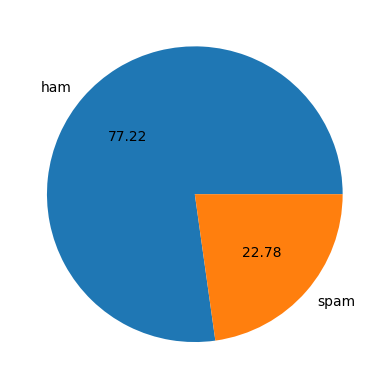

In [6]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [4]:
df.drop(columns=['text'],inplace=True)

In [5]:
df.sample()

,label,cleaned_text,num_characters,num_words,num_sentences
10845,0,gari lawrenc murphi wrote r r hettinga rah shi...,419,74,1


In [6]:
y=df['label']

In [7]:
x=df['cleaned_text']

In [11]:
x

0        go jurong point crazi avail bugi n great world...
1                                    ok lar joke wif u oni
2        free entri wkli comp win fa cup final tkt st m...
3                      u dun say earli hor u c alreadi say
4                nah dont think goe usf live around though
                               ...                        
14613    problem start book intercontinent chicago onli...
14614    amalfi hotel beauti websit interior decor that...
14615    intercontinent chicago magnific mile outsid ho...
14616    palmer hous hilton look good pictur outsid act...
14617    former chicagoan im appal amalfi hotel chicago...
Name: cleaned_text, Length: 14618, dtype: object

In [14]:
y

0        0
1        0
2        1
3        0
4        0
        ..
14613    0
14614    0
14615    0
14616    0
14617    0
Name: label, Length: 14618, dtype: int64

In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [16]:
X_train

14214    good locat look like good properti seem manag ...
5215     subject nom actual flow april th agre eileen p...
12482    url url date number number numbertnumb number ...
3443                        oh realli make air what talent
5181     subject jump gain substanti ground immedi exci...
                               ...                        
11556    yannick gingra wrote wonder techniqu make cd k...
13581    stay hotel weekend thought realli nice bed ext...
6908     subject doctor aipprov cia ll lev itra e nlarg...
10316    steve speer subject url sure rule crosspost tw...
2270      watch tv lor funni bluff wat izzit thk imposs us
Name: cleaned_text, Length: 11694, dtype: object

In [13]:
## Create the Bag OF Words model
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=2500,ngram_range=(1,2))

In [17]:
## independent features
X_train=cv.fit_transform(X_train['cleaned_text'])
X_test=cv.transform(X_test['cleaned_text'])

KeyError: 'cleaned_text'

In [ ]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
X_train

In [ ]:
cv.vocabulary_

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model=MultinomialNB().fit(X_train,y_train)

In [ ]:
y_pred=spam_detect_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))